# Tugas

1. Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

2. Anda diperbolehkan melakukan eksplorasi terhadap,
  * Metode pra pengolahan
  * Pemilihan fitur
  * Arsitektur ANN
  * Fungsi Aktiviasi

3. ANN diimplementasikan dengan menggunakan tensorflow.

4. DIKERJAKAN SECARA BERKELOMPOK

5. JELASKAN HASIL YANG ANDA DAPATKAN,
  * AKURASI
  * CONFUSION MATRIX
  * KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

### Import Library

In [1]:
import cv2   # it will allow us to load our images into the script
import numpy as np   # used for reformatting our own images
import tensorflow as tf   # main library used to load data sets, build neural networks, train them, etc.
import matplotlib.pyplot as plt   # used for visualization
from collections import Counter

### Download dataset MNIST

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

c:\Users\bag4s\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Ekstrak Data

In [6]:
from skimage.feature import hog

# Extract HOG features from the images
def extract_hog_features(images):
    hog_features = []
    for image in images:
        # Reshape the image to its original shape (28x28)
        image = image.reshape((28, 28))
        # Calculate HOG features
        hog_feature = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
        hog_features.append(hog_feature)
    return np.array(hog_features)

In [8]:
from sklearn.model_selection import train_test_split

# Extract features and labels
x, y = mnist.data.values.astype(int), mnist.target.astype(int)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train_hog = extract_hog_features(x_train)
x_test_hog = extract_hog_features(x_test)

### Normalize Data

In [9]:
x_train_hog = tf.keras.utils.normalize(x_train_hog, axis=1)
x_test_hog = tf.keras.utils.normalize(x_test_hog, axis=1)

### Preprocess Data

In [10]:
# Normalize the pixel values to the range [0, 1]
x_train_hog = x_train_hog / 255.0
x_test_hog = x_test_hog / 255.0

### Make model ANN

In [21]:
model = tf.keras.models.Sequential()

### Make layers

In [22]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(144,)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))  # 10 classes for MNIST

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               18560     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 36362 (142.04 KB)
Trainable params: 36362 (142.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling Model

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x_train_hog, y_train, epochs=25, batch_size=100, validation_data=(x_test_hog, y_test))

Epoch 1/25
560/560 [==============================] - 2s 2ms/step - loss: 2.0688 - accuracy: 0.2369 - val_loss: 1.6831 - val_accuracy: 0.3952
Epoch 2/25
560/560 [==============================] - 1s 2ms/step - loss: 1.4122 - accuracy: 0.5140 - val_loss: 1.1589 - val_accuracy: 0.5911
Epoch 3/25
560/560 [==============================] - 1s 2ms/step - loss: 1.0553 - accuracy: 0.6258 - val_loss: 0.9670 - val_accuracy: 0.6655
Epoch 4/25
560/560 [==============================] - 1s 2ms/step - loss: 0.9210 - accuracy: 0.6769 - val_loss: 0.8688 - val_accuracy: 0.7029
Epoch 5/25
560/560 [==============================] - 1s 2ms/step - loss: 0.8432 - accuracy: 0.7116 - val_loss: 0.8000 - val_accuracy: 0.7359
Epoch 6/25
560/560 [==============================] - 1s 2ms/step - loss: 0.7768 - accuracy: 0.7429 - val_loss: 0.7326 - val_accuracy: 0.7666
Epoch 7/25
560/560 [==============================] - 1s 2ms/step - loss: 0.7073 - accuracy: 0.7692 - val_loss: 0.6850 - val_accuracy: 0.7809
Epoch 

### Model Evaluation

In [28]:
# Prediction
loss, accuracy = model.evaluate(x_test_hog, y_test)
print(loss)
print(accuracy)

  1/438 [..............................] - ETA: 7s - loss: 0.3302 - accuracy: 0.8125

438/438 [==============================] - 0s 825us/step - loss: 0.3402 - accuracy: 0.8925
0.3401704430580139
0.8924999833106995


438/438 [==============================] - 0s 711us/step


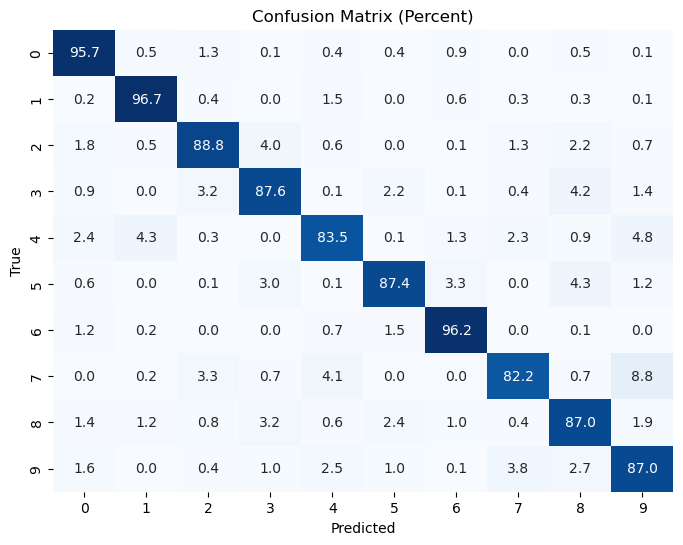

In [31]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained your model and have predictions
y_pred = model.predict(x_test_hog)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred_classes)

# Convert counts to percentages
confusion_percent = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis] * 100

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap with percentages
sns.heatmap(confusion_percent, annot=True, fmt='.1f', cmap='Blues', cbar=False, ax=ax)

# Set labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix (Percent)')

# Add class labels to the x and y axis
class_labels = [str(i) for i in range(10)]  # Assuming you have 10 classes
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

# Display the plot
plt.show()